In [1]:
# import the libraries

import numpy as np
import pandas as pd 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
#Loading the dataset and visualize first five records
df1 = pd.read_csv('Psychological_wellbeing.csv')
df1.head()

,Timestamp,Age,Gender,Monthly salary,Highest level of Education,Civil status,Employment type,Working experience,Working hours,Living arrangement for last month,Occupation of the spouse,Properties owned by you and your family (multiple choice),Living location,Working arrangement,Travel distance from home to workplace (Only answer if you are travelling to work place),Type of the traveling mode,Interpersonal Fit at Work [I value the people I work with.],Interpersonal Fit at Work [I enjoy working with the people at my job.],Interpersonal Fit at Work [I get along well with the people at my job.],Interpersonal Fit at Work [I have a relationship of trust with the people at my job.],Thriving at work [I find my job exciting.],Thriving at work [I like my job.],Thriving at work [I am proud of the job I have.],Thriving at work [I find meaning in my work.],Feeling of Competency at work [I know I am capable of doing my job.],Feeling of Competency at work [I feel confident at work.],Feeling of Competency at work [I feel effective and competent in my work.],Perceived Recognition at work [I feel that my work is recognized.],Perceived Recognition at work [I feel that my work efforts are appreciated.],Perceived Recognition at work [I feel that the people I work with recognize my abilities],Desire for Involvement at work [I want to take initiative in my work.],Desire for Involvement at work [ I care about the good functioning of my organization.],Desire for Involvement at work [ I want to contribute to achieving the goals of my organization.]
0,2022/07/18 8:09:47 PM GMT+5:30,26 - 30 years,Male,"Rs 200,001 - Rs 500,000",Master's Degree,Single,Full-time,2- 5 years,8 to 10 hr,Living with parents,No married,A Motorbike;Own a house,Other province,Online,NaN,Working from home,4,4,4,4,4,4,4,4,4,4,4,4,4,4.0,4,4,4
1,2022/07/18 8:18:53 PM GMT+5:30,26 - 30 years,Male,"Rs 200,001 - Rs 500,000",Master's Degree,Single,Full-time,2- 5 years,8 to 10 hr,Living with parents,No married,Own a house;Own a land (w/o house),Gampaha District,Online,NaN,NaN,4,5,4,5,4,3,5,5,4,4,4,4,5,5.0,3,4,4
2,2022/07/18 8:51:44 PM GMT+5:30,26 - 30 years,Male,"Rs 100,000 - Rs 200,000",Bachelor's Degree,Single,Full-time,Below 2 years,8 to 10 hr,Living with parents,No married,A vehicle (car/van);A Motorbike;Own a house;Ow...,Other province,Online,Above 100km,Working from home,5,3,5,5,0,5,5,0,5,4,0,0,2,0.0,4,4,4
3,2022/07/18 8:54:08 PM GMT+5:30,26 - 30 years,Male,"Rs 200,001 - Rs 500,000",Bachelor's Degree,Single,Full-time,2- 5 years,8 to 10 hr,Living with parents,No married,A vehicle (car/van);Own a house;Own a land (w/...,Colombo District (other than 1 to 15),Online,NaN,NaN,5,5,5,5,5,5,5,5,4,4,5,5,5,5.0,5,5,5
4,2022/07/18 9:02:19 PM GMT+5:30,26 - 30 years,Male,"Rs 200,001 - Rs 500,000",Bachelor's Degree,Single,Full-time,2- 5 years,8 to 10 hr,Living with parents,In the IT industry as me,A Motorbike;Own a land (w/o house),Other province,Online,NaN,NaN,4,4,3,4,3,4,4,3,5,4,4,2,2,2.0,2,4,5


In [4]:
df1.shape

(55, 33)

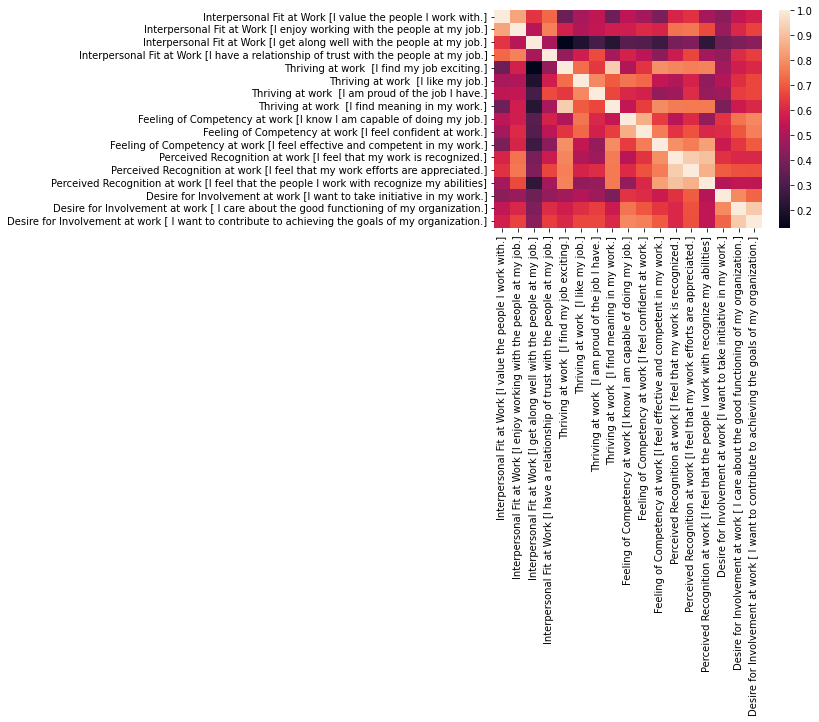

In [5]:
import seaborn as sn

corrMatrix = df1.corr()
sn.heatmap(corrMatrix, annot=False)
plt.show()

In [6]:
df1.dtypes

Timestamp                                                                                             object
Age                                                                                                   object
Gender                                                                                                object
Monthly salary                                                                                        object
Highest level of Education                                                                            object
Civil status                                                                                          object
Employment type                                                                                       object
Working experience                                                                                    object
Working hours                                                                                         object
Living arrangement 

<AxesSubplot:ylabel='Age'>

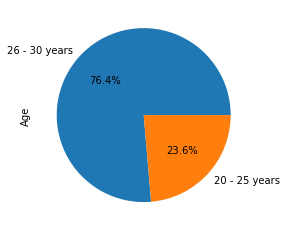

In [51]:
df1['Age'].value_counts().plot(kind = 'pie', autopct='%1.1f%%')

<AxesSubplot:ylabel='Gender'>

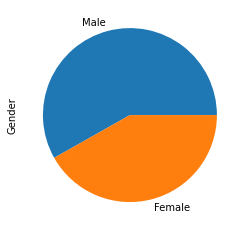

In [49]:
df1['Gender'].value_counts().plot(kind = 'pie')

<AxesSubplot:ylabel='Monthly salary'>

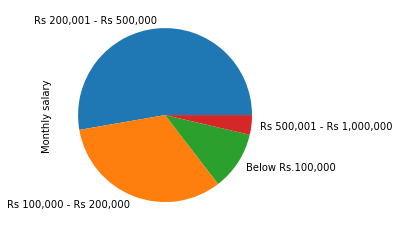

In [53]:
df1['Monthly salary'].value_counts().plot(kind = 'pie')

In [52]:
df1['Monthly salary'].value_counts()

Rs 200,001 - Rs 500,000      29
Rs 100,000 - Rs 200,000      18
Below Rs.100,000              6
Rs 500,001 - Rs 1,000,000     2
Name: Monthly salary, dtype: int64

In [7]:
columns_list_interpersonal_fit = ['Interpersonal Fit at Work [I value the people I work with.]',
                                 'Interpersonal Fit at Work [I enjoy working with the people at my job.]',
                                 'Interpersonal Fit at Work [I get along well with the people at my job.]',
                                 'Interpersonal Fit at Work [I have a relationship of trust with the people at my job.]']

In [8]:
df1['interpersonal_fit_score'] = df1[columns_list_interpersonal_fit].sum(axis=1)/4

In [9]:
columns_list_perceived_recognition = ['Perceived Recognition at work [I feel that my work is recognized.]',
                                     'Perceived Recognition at work [I feel that my work efforts are appreciated.]',
                                     'Perceived Recognition at work [I feel that the people I work with recognize my abilities]']

In [10]:
df1['perceived_recognition'] = df1[columns_list_perceived_recognition].sum(axis=1)/3

In [11]:
column_list_desire_for_involvement = ['Desire for Involvement at work [I want to take initiative in my work.]',
                                      'Desire for Involvement at work [ I care about the good functioning of my organization.]',
                                      'Desire for Involvement at work [ I want to contribute to achieving the goals of my organization.]']

In [12]:
df1['desire_for_involvement'] = df1[column_list_desire_for_involvement].sum(axis=1)/3

In [13]:
column_list_thriving_at_work =  ['Thriving at work  [I find my job exciting.]',
                                 'Thriving at work  [I like my job.]',
                                 'Thriving at work  [I am proud of the job I have.]',
                                 'Thriving at work  [I find meaning in my work.]']

In [14]:
df1['thriving_score'] = df1[column_list_thriving_at_work].sum(axis=1)/4

In [15]:
column_list_thriving_at_work = ['Feeling of Competency at work [I know I am capable of doing my job.]',
                                'Feeling of Competency at work [I feel confident at work.]',
                                'Feeling of Competency at work [I feel effective and competent in my work.]']

In [16]:
df1['competency_score'] = df1[column_list_thriving_at_work].sum(axis=1)/3


In [17]:
df1.head()

,Timestamp,Age,Gender,Monthly salary,Highest level of Education,Civil status,Employment type,Working experience,Working hours,Living arrangement for last month,Occupation of the spouse,Properties owned by you and your family (multiple choice),Living location,Working arrangement,Travel distance from home to workplace (Only answer if you are travelling to work place),Type of the traveling mode,Interpersonal Fit at Work [I value the people I work with.],Interpersonal Fit at Work [I enjoy working with the people at my job.],Interpersonal Fit at Work [I get along well with the people at my job.],Interpersonal Fit at Work [I have a relationship of trust with the people at my job.],Thriving at work [I find my job exciting.],Thriving at work [I like my job.],Thriving at work [I am proud of the job I have.],Thriving at work [I find meaning in my work.],Feeling of Competency at work [I know I am capable of doing my job.],Feeling of Competency at work [I feel confident at work.],Feeling of Competency at work [I feel effective and competent in my work.],Perceived Recognition at work [I feel that my work is recognized.],Perceived Recognition at work [I feel that my work efforts are appreciated.],Perceived Recognition at work [I feel that the people I work with recognize my abilities],Desire for Involvement at work [I want to take initiative in my work.],Desire for Involvement at work [ I care about the good functioning of my organization.],Desire for Involvement at work [ I want to contribute to achieving the goals of my organization.],interpersonal_fit_score,perceived_recognition,desire_for_involvement,thriving_score,competency_score
0,2022/07/18 8:09:47 PM GMT+5:30,26 - 30 years,Male,"Rs 200,001 - Rs 500,000",Master's Degree,Single,Full-time,2- 5 years,8 to 10 hr,Living with parents,No married,A Motorbike;Own a house,Other province,Online,NaN,Working from home,4,4,4,4,4,4,4,4,4,4,4,4,4,4.0,4,4,4,4.00,4.000000,4.000000,4.00,4.000000
1,2022/07/18 8:18:53 PM GMT+5:30,26 - 30 years,Male,"Rs 200,001 - Rs 500,000",Master's Degree,Single,Full-time,2- 5 years,8 to 10 hr,Living with parents,No married,Own a house;Own a land (w/o house),Gampaha District,Online,NaN,NaN,4,5,4,5,4,3,5,5,4,4,4,4,5,5.0,3,4,4,4.50,4.666667,3.666667,4.25,4.000000
2,2022/07/18 8:51:44 PM GMT+5:30,26 - 30 years,Male,"Rs 100,000 - Rs 200,000",Bachelor's Degree,Single,Full-time,Below 2 years,8 to 10 hr,Living with parents,No married,A vehicle (car/van);A Motorbike;Own a house;Ow...,Other province,Online,Above 100km,Working from home,5,3,5,5,0,5,5,0,5,4,0,0,2,0.0,4,4,4,4.50,0.666667,4.000000,2.50,3.000000
3,2022/07/18 8:54:08 PM GMT+5:30,26 - 30 years,Male,"Rs 200,001 - Rs 500,000",Bachelor's Degree,Single,Full-time,2- 5 years,8 to 10 hr,Living with parents,No married,A vehicle (car/van);Own a house;Own a land (w/...,Colombo District (other than 1 to 15),Online,NaN,NaN,5,5,5,5,5,5,5,5,4,4,5,5,5,5.0,5,5,5,5.00,5.000000,5.000000,5.00,4.333333
4,2022/07/18 9:02:19 PM GMT+5:30,26 - 30 years,Male,"Rs 200,001 - Rs 500,000",Bachelor's Degree,Single,Full-time,2- 5 years,8 to 10 hr,Living with parents,In the IT industry as me,A Motorbike;Own a land (w/o house),Other province,Online,NaN,NaN,4,4,3,4,3,4,4,3,5,4,4,2,2,2.0,2,4,5,3.75,2.000000,3.666667,3.50,4.333333


In [18]:
import pylab as pl

Text(0, 0.5, 'Frequency')

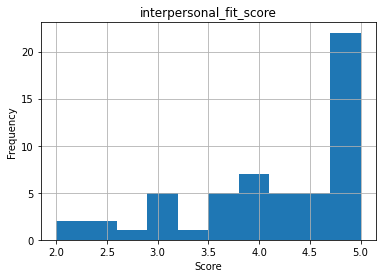

In [19]:
df1.hist(column='interpersonal_fit_score')
pl.xlabel("Score")
pl.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

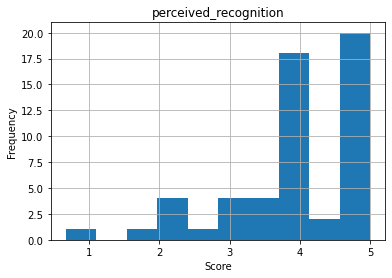

In [20]:
df1.hist(column='perceived_recognition')
pl.xlabel("Score")
pl.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

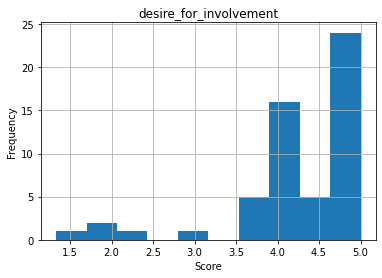

In [21]:
df1.hist(column='desire_for_involvement')
pl.xlabel("Score")
pl.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

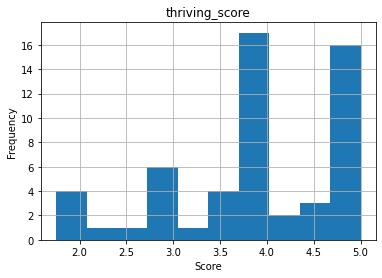

In [22]:
df1.hist(column='thriving_score')
pl.xlabel("Score")
pl.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

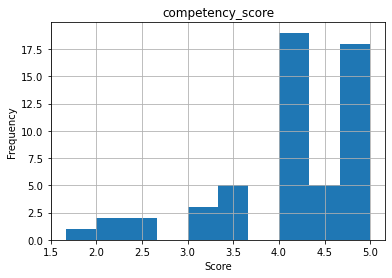

In [23]:
df1.hist(column='competency_score')
pl.xlabel("Score")
pl.ylabel("Frequency")

In [24]:
def plotData(feature, title, xlabel, ylabel): 
    #feature = 'Gender'
    groupby= df1.groupby([feature]).mean().iloc[:,-5:]
    groupbyi =groupby  #.reset_index()  

    import matplotlib.pyplot as plot

    groupbyi.plot(kind="bar",rot=45, title=title).legend(bbox_to_anchor=(1.0, 1.0))

    plot.xlabel(xlabel)
    plot.ylabel(ylabel)
    plot.ylim([1, 5])

    plot.show(block=True);


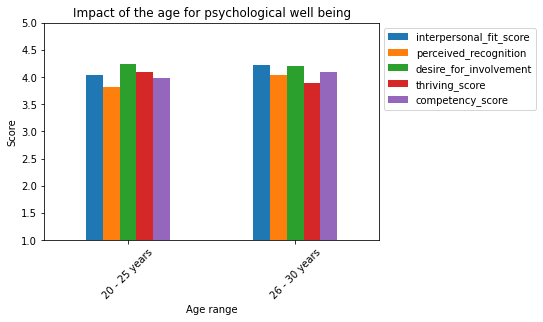

In [25]:
plotData('Age',"Impact of the age for psychological well being", "Age range", "Score")

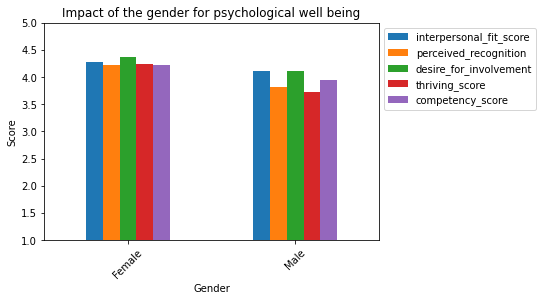

In [26]:
plotData('Gender',"Impact of the gender for psychological well being", "Gender", "Score")

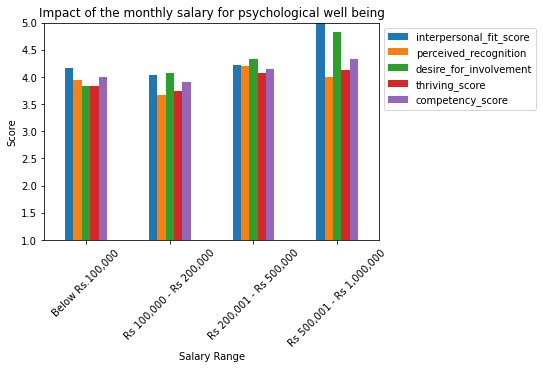

In [27]:
plotData('Monthly salary',"Impact of the monthly salary for psychological well being", "Salary Range", "Score")

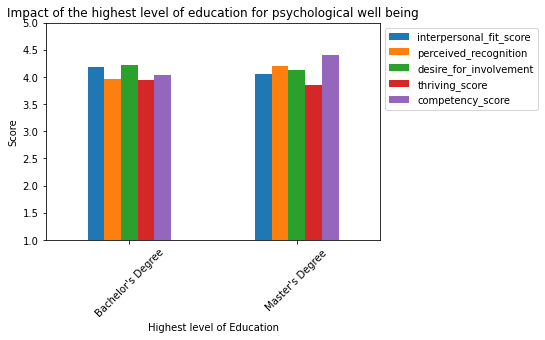

In [28]:
plotData('Highest level of Education',"Impact of the highest level of education for psychological well being", "Highest level of Education", "Score")

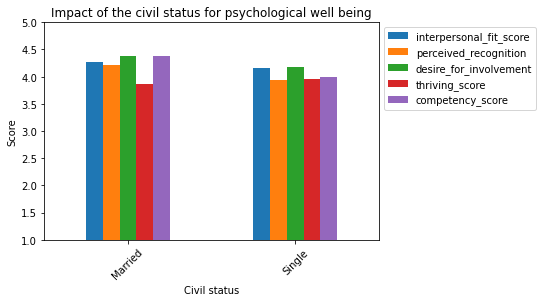

In [29]:
plotData('Civil status',"Impact of the civil status for psychological well being", "Civil status", "Score")

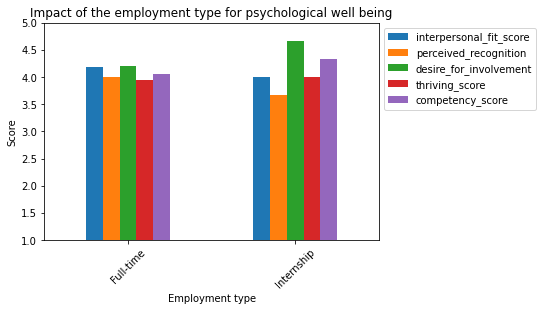

In [30]:
plotData('Employment type',"Impact of the employment type for psychological well being", "Employment type", "Score")

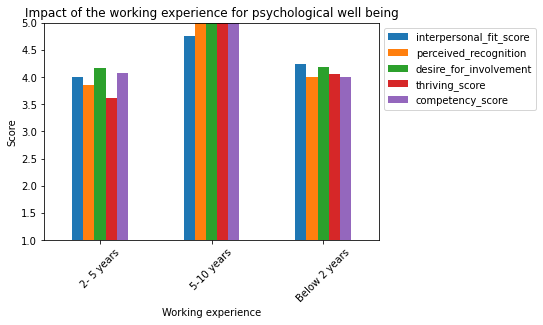

In [31]:
plotData('Working experience',"Impact of the working experience for psychological well being", "Working experience", "Score")

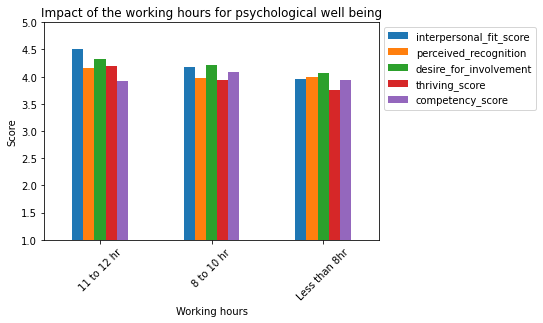

In [32]:
plotData('Working hours',"Impact of the working hours for psychological well being", "Working hours", "Score")

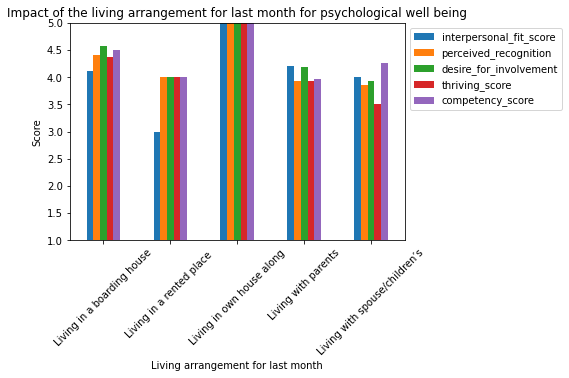

In [33]:
plotData('Living arrangement for last month',"Impact of the living arrangement for last month for psychological well being", "Living arrangement for last month", "Score")

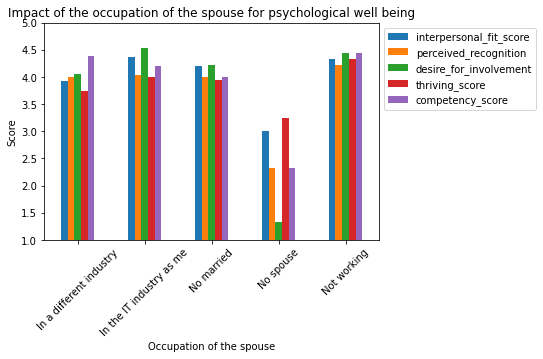

In [34]:
plotData('Occupation of the spouse',"Impact of the occupation of the spouse for psychological well being", "Occupation of the spouse", "Score")

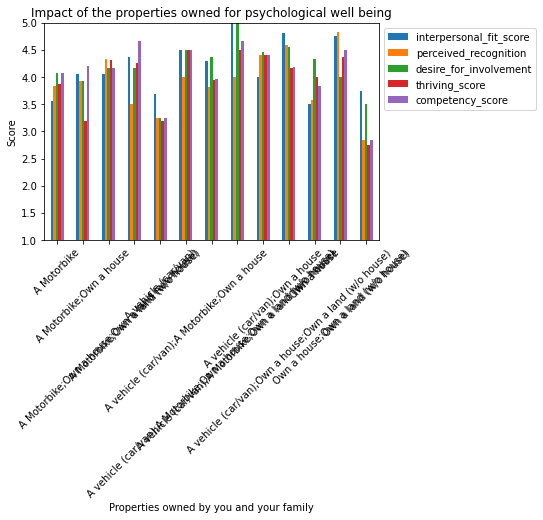

In [35]:
plotData('Properties owned by you and your family (multiple choice)',"Impact of the properties owned for psychological well being", "Properties owned by you and your family", "Score")

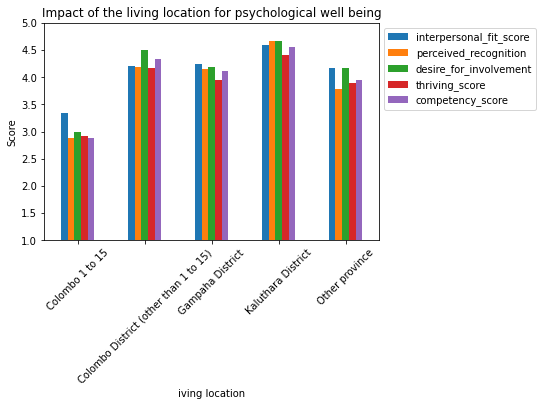

In [36]:
plotData('Living location',"Impact of the living location for psychological well being", "iving location", "Score")

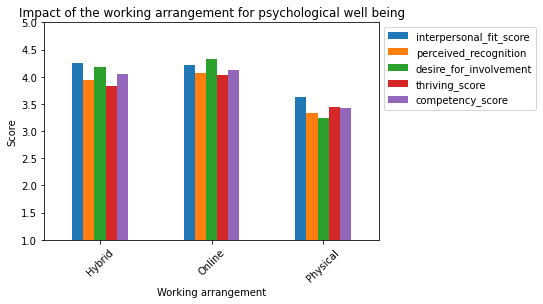

In [37]:
plotData('Working arrangement',"Impact of the working arrangement for psychological well being", "Working arrangement", "Score")

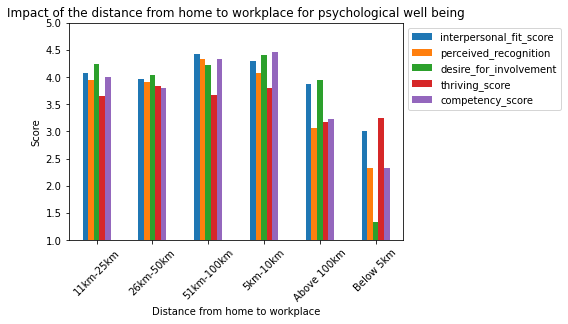

In [38]:
plotData('Travel distance from home to workplace (Only answer if you are travelling to work place)',"Impact of the distance from home to workplace for psychological well being", "Distance from home to workplace", "Score")

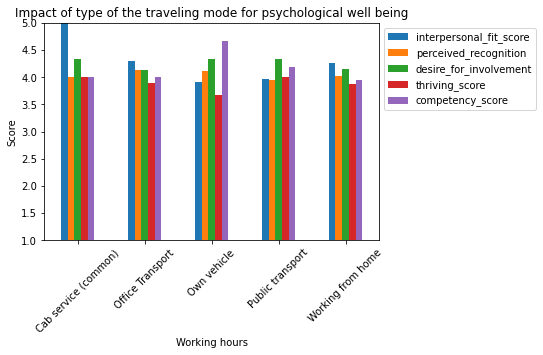

In [39]:
plotData('Type of the traveling mode',"Impact of type of the traveling mode for psychological well being", "Working hours", "Score")

In [40]:
groupbyAge= df1.groupby(['Age']).mean().iloc[:,-5:]
score =groupbyAge.T

In [41]:
score.index

Index(['interpersonal_fit_score', 'perceived_recognition',
       'desire_for_involvement', 'thriving_score', 'competency_score'],
      dtype='object')

In [42]:
score

Age,20 - 25 years,26 - 30 years
interpersonal_fit_score,4.038462,4.220238
perceived_recognition,3.820513,4.039683
desire_for_involvement,4.230769,4.206349
thriving_score,4.096154,3.892857
competency_score,3.974359,4.087302


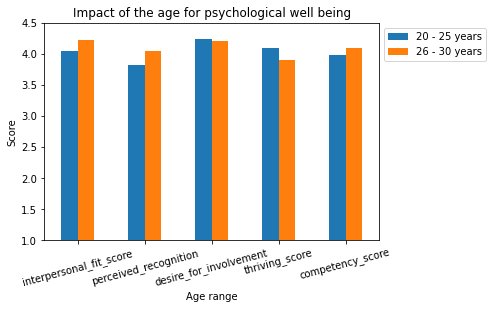

In [43]:
import matplotlib.pyplot as plot

score.plot(kind="bar",rot=15, title="Impact of the age for psychological well being").legend(bbox_to_anchor=(1.0, 1.0))

plot.xlabel("Age range")
plot.ylabel("Score")
plot.ylim([1, 4.5])

plot.show(block=True);